In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

#Load CIFAR-10 dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the model architecture

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

In [8]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 81s 51ms/step - loss: 1.5305 - accuracy: 0.4391 - val_loss: 1.3297 - val_accuracy: 0.5274
Epoch 2/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.1660 - accuracy: 0.5874 - val_loss: 1.0931 - val_accuracy: 0.6152
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0149 - accuracy: 0.6449 - val_loss: 0.9999 - val_accuracy: 0.6488
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9123 - accuracy: 0.6802 - val_loss: 0.9796 - val_accuracy: 0.6569
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8397 - accuracy: 0.7056 - val_loss: 0.9076 - val_accuracy: 0.6844
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7887 - accuracy: 0.7214 - val_loss: 0.8743 - val_accuracy: 0.6987
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7498 - accuracy: 0.7380 - val_loss: 0.9407 -

# Evaluate the model

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 4s - loss: 0.8515 - accuracy: 0.7151 - 4s/epoch - 11ms/step
Test accuracy: 0.7150999903678894


# Plot training history

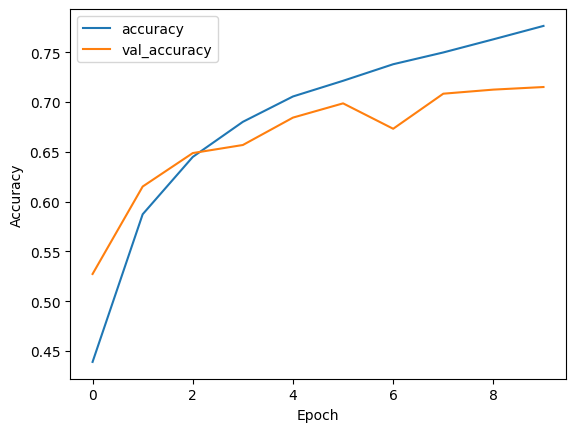

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()